In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)
meanshift=MeanShift(bandwidth=0.8)
cluster_label = meanshift.fit_predict(X)
print('cluster types:', np.unique(cluster_label))

cluster types: [0 1 2 3 4 5]


In [9]:
meanshift=MeanShift(bandwidth=1)
cluster_label = meanshift.fit_predict(X)
print('cluster types:', np.unique(cluster_label))

cluster types: [0 1 2]


In [11]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('estimated_bandwidth:', round(bandwidth,3))

estimated_bandwidth: 1.816


In [20]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# bandwidth estimation using estimate_bandwidth()
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster types:', np.unique(cluster_labels))

cluster types: [0 1 2]


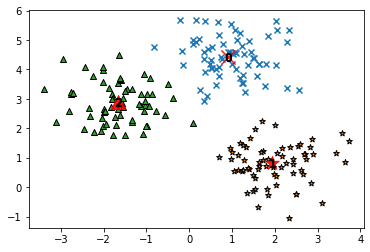

In [21]:
import matplotlib.pyplot as plt

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['x', '*', '^', 's', 'o']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # scatter plot for each label
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    # cluster center indication
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='r', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

In [24]:
clusterDF.groupby('target')['meanshift_label'].value_counts()

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64